In [120]:
import pandas as pd 
import numpy as np 
import spacy
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud
import matplotlib.pyplot as plt

## Organize

In [121]:
#Rap Love
df_love = pd.read_csv('/home/lettuce/MyCode/Where is the love/Where-is-the-love/csv/final/rap_LOVE_2.csv')
df_love = df_love.drop(df_love.columns[[0, 1]], axis=1)
df_love.head()
#norm
df = pd.read_csv("/home/lettuce/MyCode/Where is the love/Where-is-the-love/csv/final/rap_FINAL_2.csv")
df = df.drop(df.columns[[0, 1]], axis=1)
df.head()
df_era = pd.read_csv("/home/lettuce/MyCode/Where is the love/Where-is-the-love/csv/rap_ERA.csv")

In [122]:
#Con Love
df_love_con = pd.read_csv('/home/lettuce/MyCode/Where is the love/Where-is-the-love/csv/final/country_LOVE.csv')
df_love_con = df_love_con.iloc[:, 2:]
df_era_con = pd.read_csv("/home/lettuce/MyCode/Where is the love/Where-is-the-love/csv/country_ERA.csv")


In [123]:
nlp = spacy.load('en_core_web_sm')
def is_verb_noun_adj(word):
    # Process the word
    doc = nlp(word)

    # Check the part of speech tag of the first token (should be the only one)
    pos = doc[0].pos_

    # Return True if it's a verb, noun or adjective, otherwise False
    return pos in ['VERB', 'NOUN', 'ADJ']

In [124]:
#Rap
df_love = df_love.loc[:, df_love.columns.map(is_verb_noun_adj)]
df = df.loc[:, df.columns.map(is_verb_noun_adj)]

In [125]:
#Con
df_love_con = df_love_con.loc[:, df_love_con.columns.map(is_verb_noun_adj)]
#df = df.loc[:, df.columns.map(is_verb_noun_adj)]
df_love_con

,Artist Name,love,loving,loved,way,loves,dont,know,heart,ill,...,strong,save,call,known,music,hurts,knows,wrong,bit,left
0,Total,5967.0,628.0,383.0,348.0,330.0,274.0,199.0,197.0,191.0,...,19.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,17.0
1,Johnny Cash,32.0,1.0,5.0,0.0,0.0,0.0,4.0,0.0,1.0,...,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,Hank Williams,25.0,2.0,0.0,0.0,0.0,5.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,George Strait,69.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Merle Haggard,11.0,6.0,0.0,2.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,Kitty Wells,44.0,2.0,4.0,9.0,0.0,1.0,1.0,1.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
97,Bobby Bare,16.0,0.0,4.0,0.0,3.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
98,Patty Loveless,87.0,18.0,16.0,4.0,6.0,1.0,10.0,9.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
99,Rascal Flatts,45.0,3.0,2.0,2.0,5.0,0.0,4.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0


In [126]:
#Take Out total for new df
df_love_NT = df_love.drop(df_love.index[0]).reset_index(drop=True)
df_NT = df.drop(df.index[0]).reset_index(drop=True)


In [127]:
#Con take out total
df_love_con = df_love_con.drop(df_love_con.index[0]).reset_index(drop=True)
df_love_con

,Artist Name,love,loving,loved,way,loves,dont,know,heart,ill,...,strong,save,call,known,music,hurts,knows,wrong,bit,left
0,Johnny Cash,32.0,1.0,5.0,0.0,0.0,0.0,4.0,0.0,1.0,...,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1,Hank Williams,25.0,2.0,0.0,0.0,0.0,5.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,George Strait,69.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Merle Haggard,11.0,6.0,0.0,2.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Alan Jackson,151.0,22.0,8.0,8.0,6.0,2.0,1.0,4.0,4.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Kitty Wells,44.0,2.0,4.0,9.0,0.0,1.0,1.0,1.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
96,Bobby Bare,16.0,0.0,4.0,0.0,3.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
97,Patty Loveless,87.0,18.0,16.0,4.0,6.0,1.0,10.0,9.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
98,Rascal Flatts,45.0,3.0,2.0,2.0,5.0,0.0,4.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0


In [128]:
#Era for rap
df_love_NT["Era"] = df_era["Era"]
df_NT["Era"] = df_era["Era"]

In [129]:
df_love_con["Era"] = df_era_con["Era"]
df_love_con

,Artist Name,love,loving,loved,way,loves,dont,know,heart,ill,...,save,call,known,music,hurts,knows,wrong,bit,left,Era
0,Johnny Cash,32.0,1.0,5.0,0.0,0.0,0.0,4.0,0.0,1.0,...,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1960s
1,Hank Williams,25.0,2.0,0.0,0.0,0.0,5.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1950s
2,George Strait,69.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1980s
3,Merle Haggard,11.0,6.0,0.0,2.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1970s
4,Alan Jackson,151.0,22.0,8.0,8.0,6.0,2.0,1.0,4.0,4.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1990s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Kitty Wells,44.0,2.0,4.0,9.0,0.0,1.0,1.0,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1980s
96,Bobby Bare,16.0,0.0,4.0,0.0,3.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1990s
97,Patty Loveless,87.0,18.0,16.0,4.0,6.0,1.0,10.0,9.0,2.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1980s
98,Rascal Flatts,45.0,3.0,2.0,2.0,5.0,0.0,4.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,2000s


In [130]:
df_country_era = pd.read_csv('/home/lettuce/MyCode/Where is the love/Where-is-the-love/csv/country_ERA.csv')
df_country_era.value_counts("Era")

Era
1970s    22
1990s    17
1960s    15
1980s    14
2000s    10
2010s    10
1950s     6
1930s     2
1940s     2
2020s     2
dtype: int64

## Graphs


#### RAP (use of the word love over eras)

In [131]:
#Fixing sample size to 20 most popular Artists per Era
df_love_NT['Era'].value_counts()
df_love_Era = df_love_NT.groupby('Era').apply(lambda x: x.head(20)).reset_index(drop=True)
df_love_Era
#Fixing sample size to 20 random Artists per Era
df_temp = df_love_NT.groupby('Era').apply(lambda x: x.sample(min(len(x), 20))).reset_index(drop=True)
df_love_Era_Random = df_temp.groupby('Era').apply(lambda x: x.head(20)).reset_index(drop=True)
df_love_Era_Random


/tmp/ipykernel_14794/1611365347.py:7: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_love_Era_Random = df_temp.groupby('Era').apply(lambda x: x.head(20)).reset_index(drop=True)


,Artist Name,love,dont,know,do,got,song,make,track,get,...,easy,takes,banger,freddie,gibbs,turned,experiences,references,release,Era
0,MC Ren,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1980s
1,KRS-One,7.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1980s
2,Grandmaster Flash,25.0,0.0,1.0,0.0,1.0,0.0,4.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1980s
3,Sugarhill Gang,67.0,0.0,14.0,0.0,1.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1980s
4,Run-DMC,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1980s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,J.I.D,18.0,7.0,4.0,2.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020s
96,A Boogie wit da Hoodie,49.0,9.0,7.0,1.0,1.0,0.0,8.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020s
97,Lil Baby,14.0,0.0,4.0,0.0,1.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020s
98,JPEGMAFIA,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020s


In [132]:
df_love_Era['love_total'] = df_love_Era[['love', 'loved', 'loves', 'loving']].sum(axis=1)
df_grouped_rap = df_love_Era.groupby('Era')[['love_total']].sum()
df_grouped_rap = df_grouped_rap.reset_index()

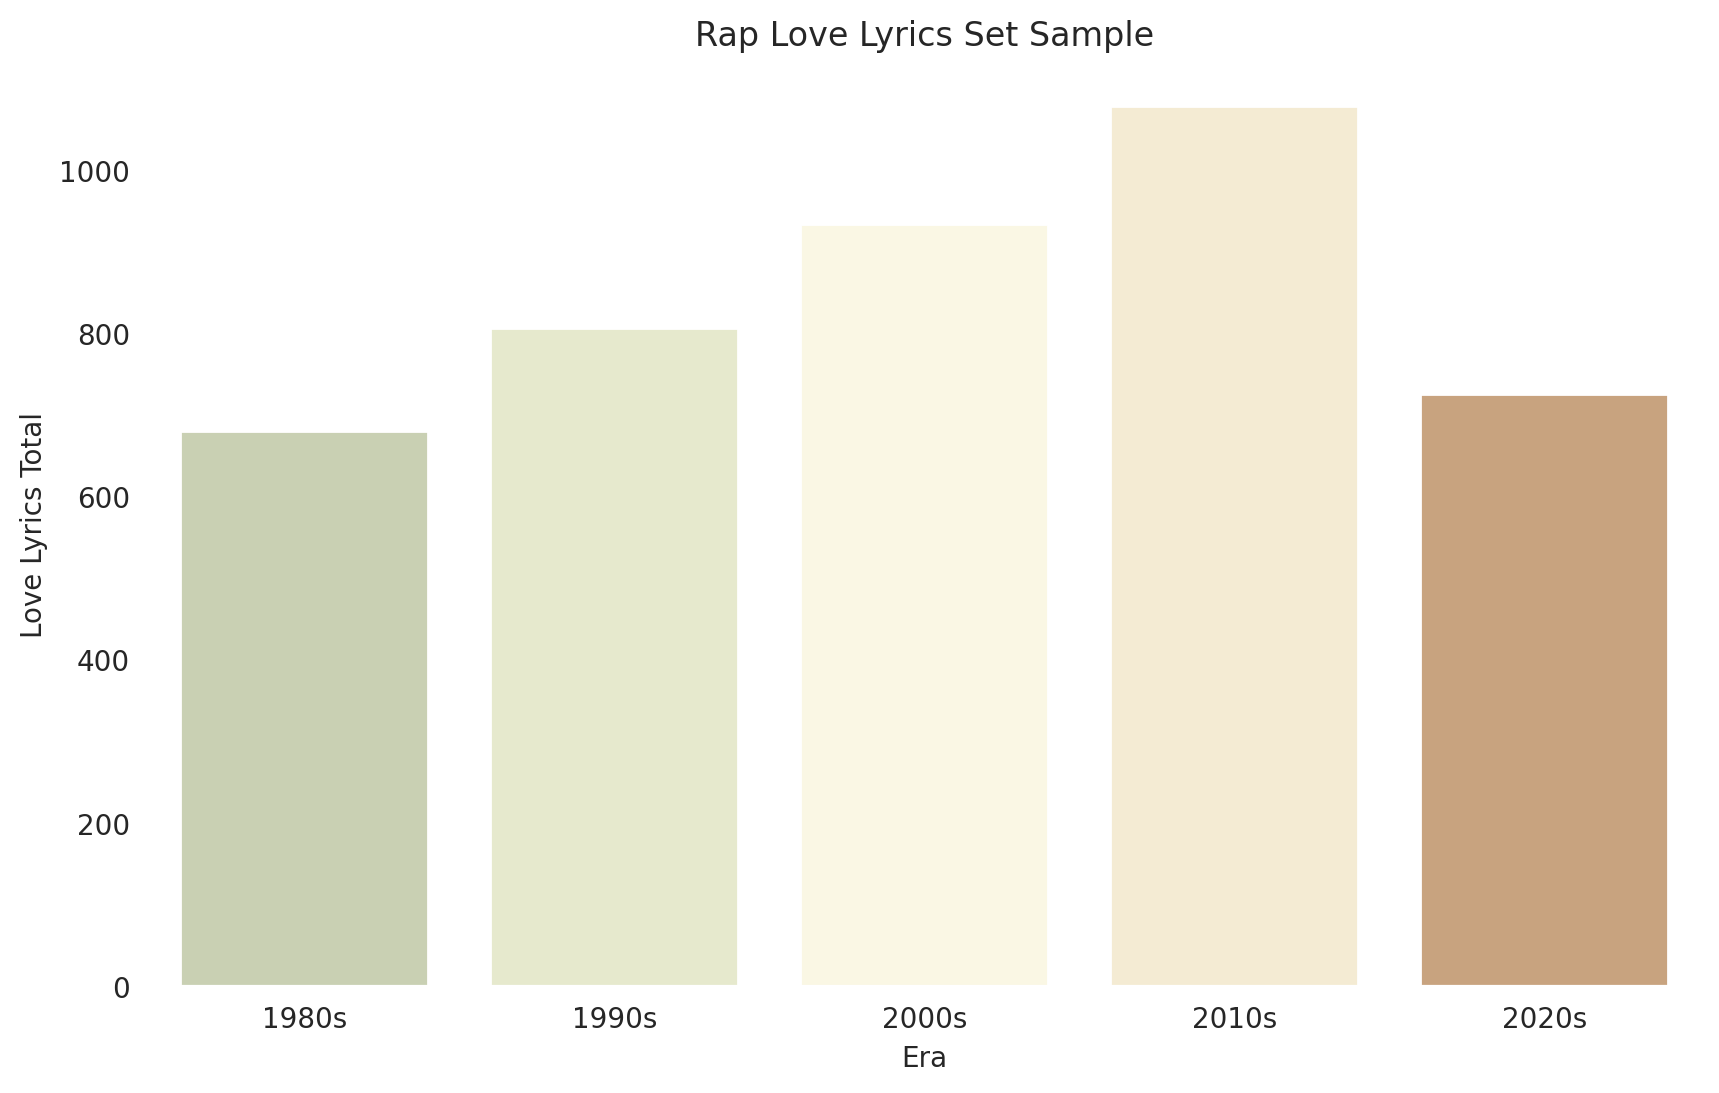

In [133]:
#
plt.figure(figsize=(10, 6), dpi=200)
colors = ['#ccd5ae', '#e9edc9', '#fefae0', '#faedcd', '#d4a373']
sns.set_style("darkgrid", {"axes.facecolor": "#FFFFFF"}) # replace with your hex code
sns.barplot(data=df_grouped_rap,x='Era',y='love_total',errorbar=None,palette=colors)
plt.xlabel('Era')
plt.ylabel('Love Lyrics Total')
plt.title('Rap Love Lyrics Set Sample')
plt.show()


In [134]:
df_love_Era_Random['love_total'] = df_love_Era_Random[['love', 'loved', 'loves', 'loving']].sum(axis=1)
df_grouped = df_love_Era_Random.groupby('Era')[['love_total']].sum()
df_grouped = df_grouped.reset_index()

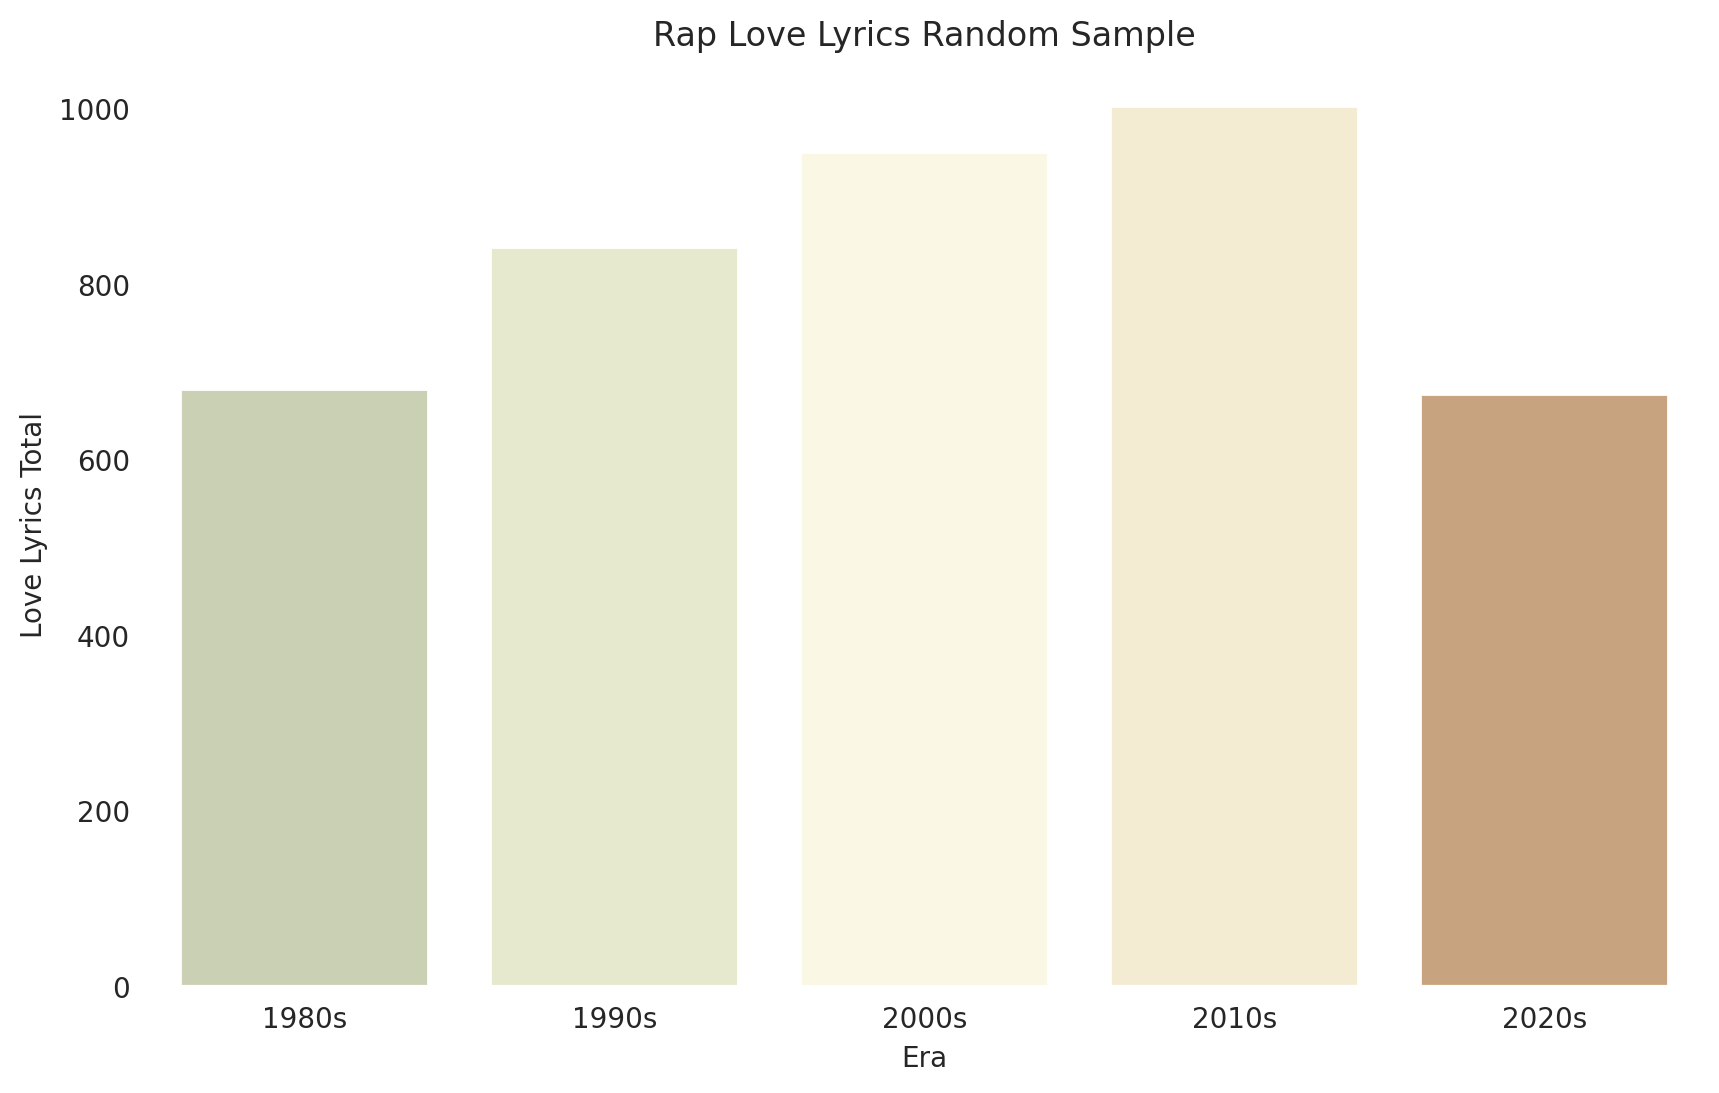

In [135]:
#
plt.figure(figsize=(10, 6), dpi=200)
colors = ['#ccd5ae', '#e9edc9', '#fefae0', '#faedcd', '#d4a373']
sns.set_style("darkgrid", {"axes.facecolor": "#FFFFFF"}) # replace with your hex code
sns.barplot(data=df_grouped,x='Era',y='love_total',errorbar=None,palette=colors)
plt.xlabel('Era')
plt.ylabel('Love Lyrics Total')
plt.title('Rap Love Lyrics Random Sample')
plt.show()

## Country (use of the word love over eras) 

In [136]:
df_love_con


,Artist Name,love,loving,loved,way,loves,dont,know,heart,ill,...,save,call,known,music,hurts,knows,wrong,bit,left,Era
0,Johnny Cash,32.0,1.0,5.0,0.0,0.0,0.0,4.0,0.0,1.0,...,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1960s
1,Hank Williams,25.0,2.0,0.0,0.0,0.0,5.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1950s
2,George Strait,69.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1980s
3,Merle Haggard,11.0,6.0,0.0,2.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1970s
4,Alan Jackson,151.0,22.0,8.0,8.0,6.0,2.0,1.0,4.0,4.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1990s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Kitty Wells,44.0,2.0,4.0,9.0,0.0,1.0,1.0,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1980s
96,Bobby Bare,16.0,0.0,4.0,0.0,3.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1990s
97,Patty Loveless,87.0,18.0,16.0,4.0,6.0,1.0,10.0,9.0,2.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1980s
98,Rascal Flatts,45.0,3.0,2.0,2.0,5.0,0.0,4.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,2000s


In [137]:
eras_to_remove = ['1950s', '1930s', '1940s', '2020s']
df_love_con = df_love_con[~df_love_con['Era'].isin(eras_to_remove)]
df_love_con.value_counts('Era')

Era
1970s    22
1990s    17
1960s    15
1980s    14
2000s    10
2010s    10
dtype: int64

In [138]:
df_love_con
#Fixing sample size to 20 most popular Artists per Era
df_love_con['Era'].value_counts()
df_love_Era = df_love_con.groupby('Era').apply(lambda x: x.head(10)).reset_index(drop=True)
df_love_Era
#Fixing sample size to 20 random Artists per Era
df_temp = df_love_con.groupby('Era').apply(lambda x: x.sample(min(len(x), 10))).reset_index(drop=True)
df_love_Era_Random = df_temp.groupby('Era').apply(lambda x: x.head(10)).reset_index(drop=True)


/tmp/ipykernel_14794/857436814.py:8: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_love_Era_Random = df_temp.groupby('Era').apply(lambda x: x.head(10)).reset_index(drop=True)


In [139]:
df_love_Era['love_total'] = df_love_Era[['love', 'loved', 'loves', 'loving']].sum(axis=1)
df_grouped_con = df_love_Era.groupby('Era')[['love_total']].sum()
df_grouped_con = df_grouped_con.reset_index()

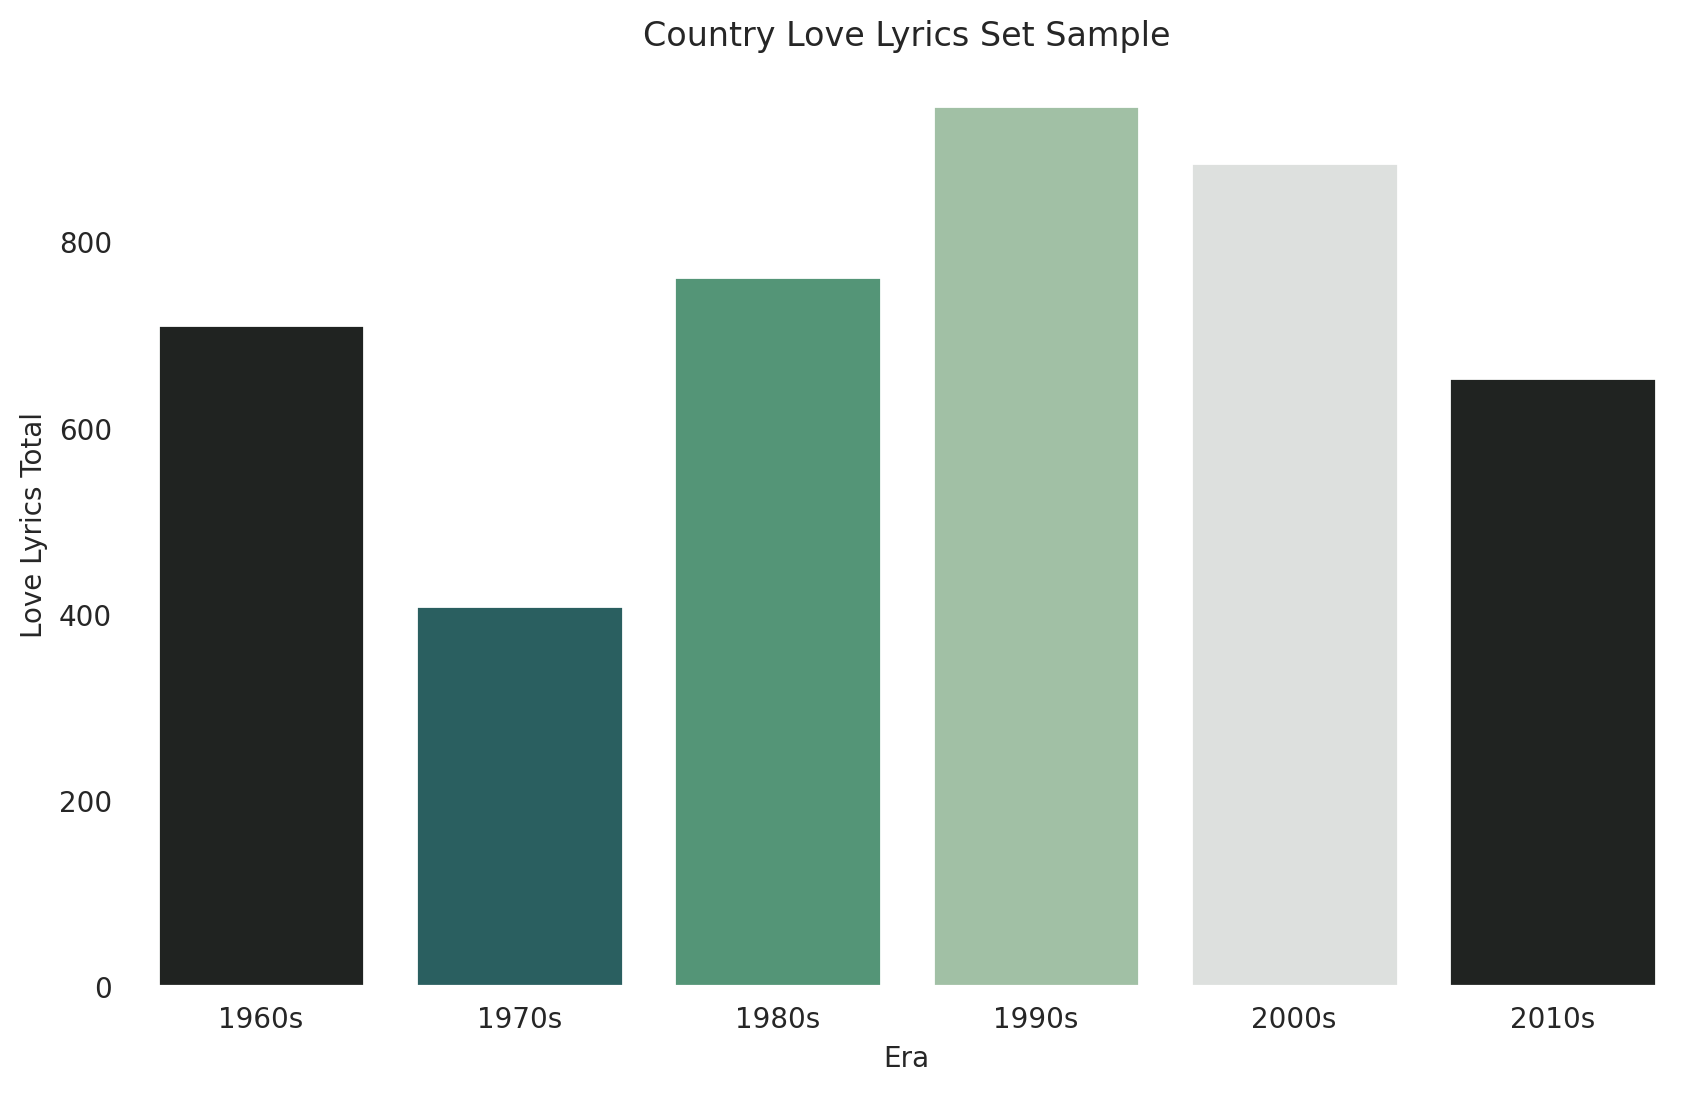

In [140]:
#CON Set
plt.figure(figsize=(10, 6), dpi=200)
colors = ['#1f2421', '#216869', '#49a078', '#9cc5a1', '#dce1de']
sns.set_style("darkgrid", {"axes.facecolor": "#FFFFFF"}) # replace with your hex code
sns.barplot(data=df_grouped_con,x='Era',y='love_total',errorbar=None,palette=colors)
plt.xlabel('Era')
plt.ylabel('Love Lyrics Total')
plt.title('Country Love Lyrics Set Sample')
plt.show()


In [141]:
df_love_Era_Random['love_total'] = df_love_Era_Random[['love', 'loved', 'loves', 'loving']].sum(axis=1)
df_grouped = df_love_Era_Random.groupby('Era')[['love_total']].sum()
df_grouped = df_grouped.reset_index()

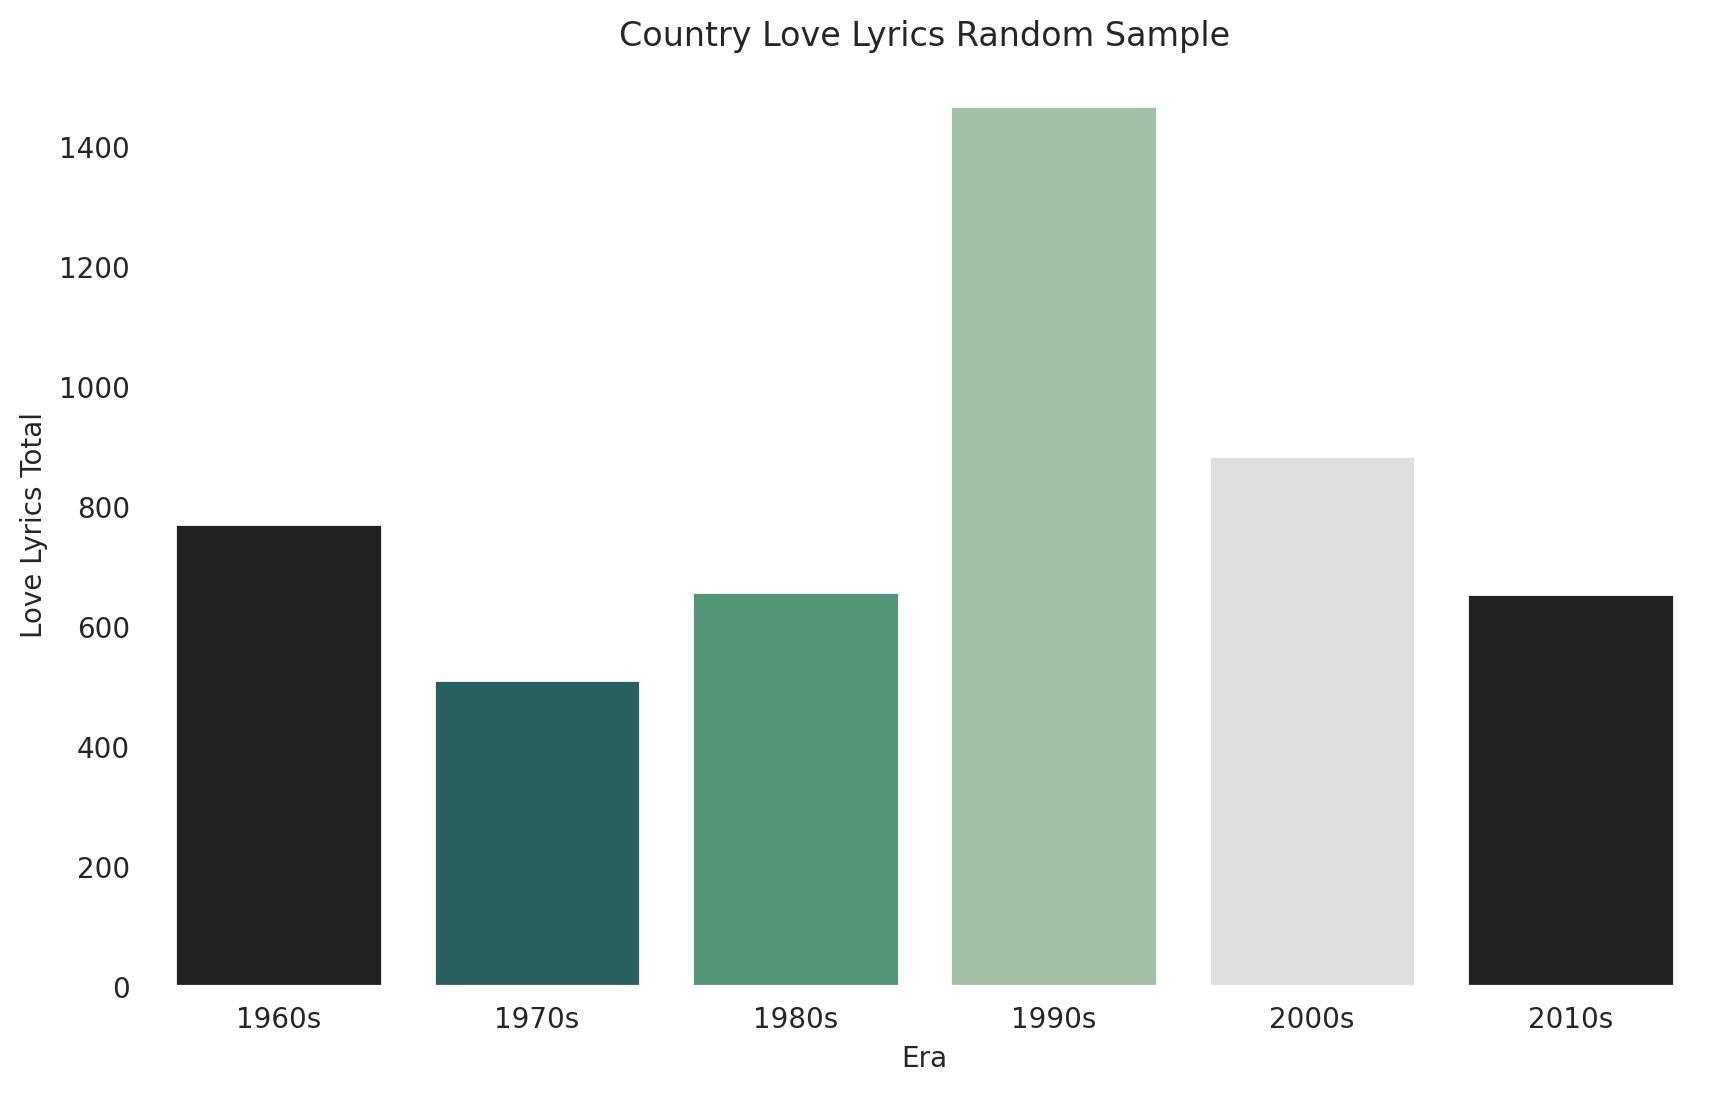

In [142]:
#Con Random
plt.figure(figsize=(10, 6), dpi=200)
colors = ['#1f2421', '#216869', '#49a078', '#9cc5a1', '#dce1de']
sns.set_style("darkgrid", {"axes.facecolor": "#FFFFFF"}) # replace with your hex code
sns.barplot(data=df_grouped,x='Era',y='love_total',errorbar=None,palette=colors)
plt.xlabel('Era')
plt.ylabel('Love Lyrics Total')
plt.title('Country Love Lyrics Random Sample')
plt.show()

## Comparison rap and country lyrics

In [155]:
df_grouped_rap #Setting 20 artist count to 10
df_grouped_rap['love_total'] = (df_grouped_rap['love_total'] / 2).round()

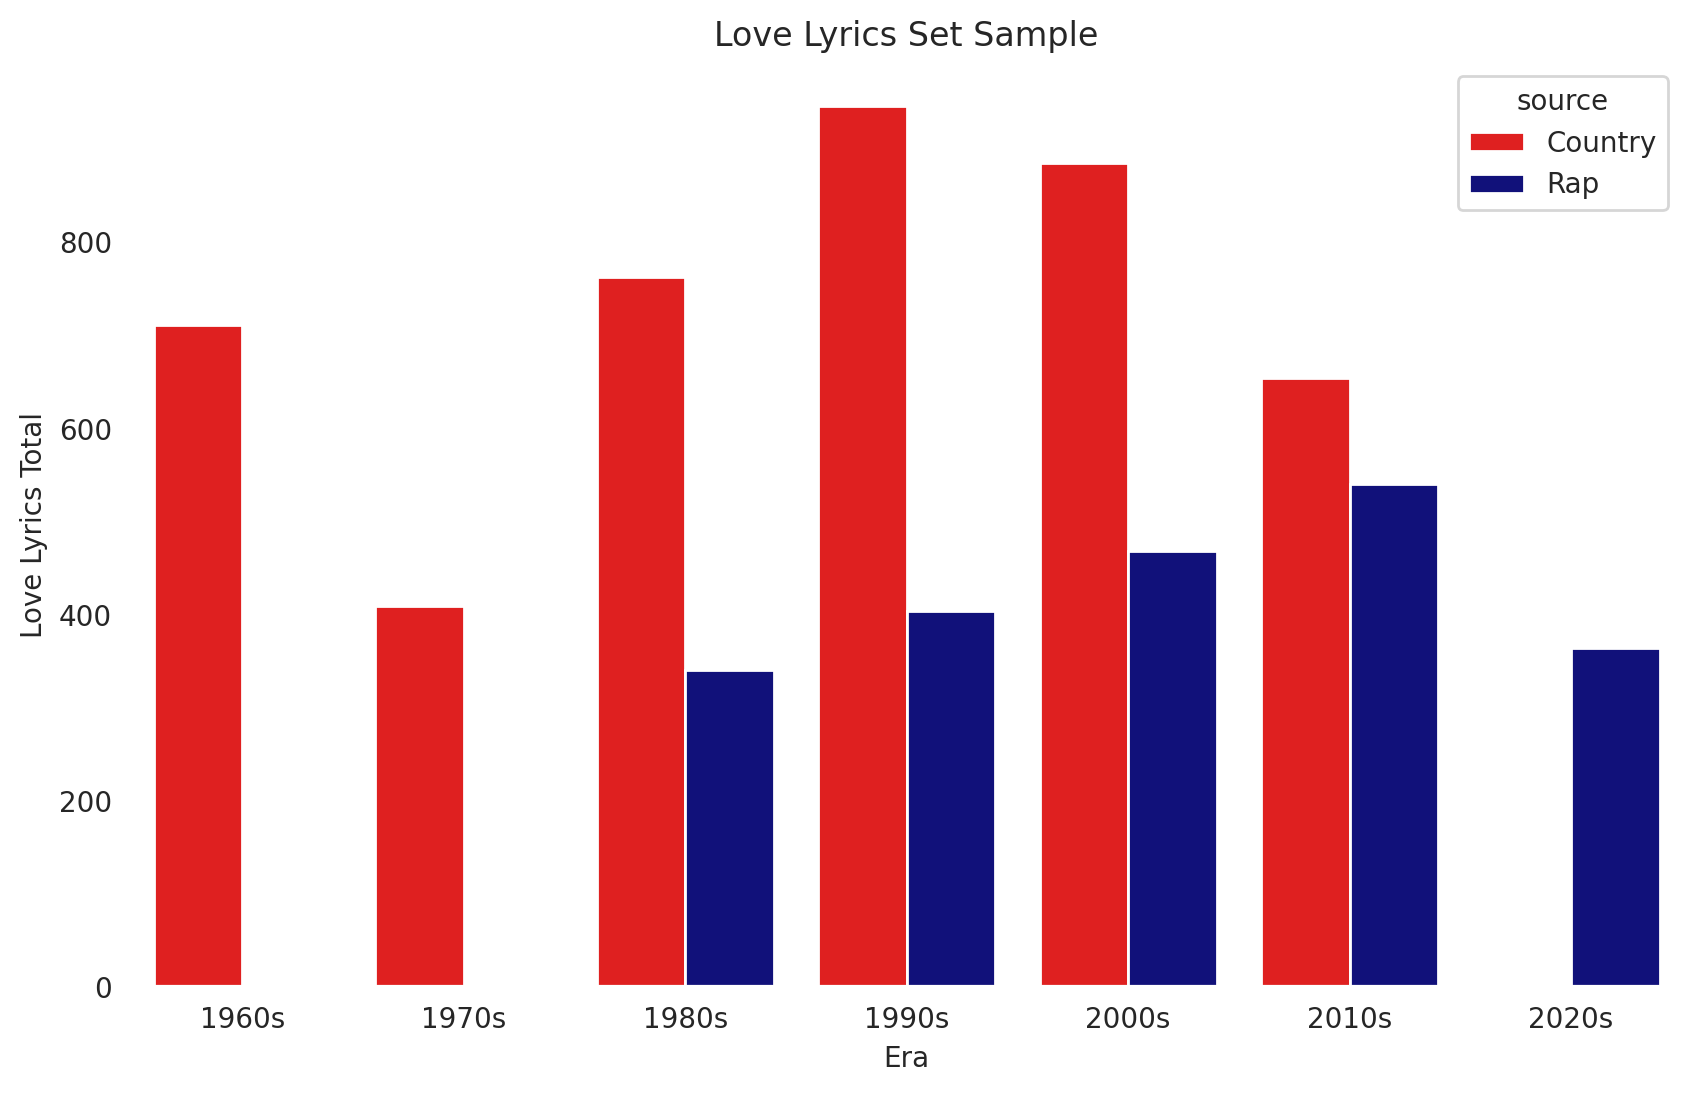

In [156]:
# Add a 'source' column to each dataframe
df_grouped_rap['source'] = 'Rap'
df_grouped_con['source'] = 'Country'

# Concatenate the dataframes
df = pd.concat([df_grouped_rap, df_grouped_con])

era_order = ['1960s', '1970s', '1980s', '1990s', '2000s', '2010s', '2020s']
df['Era'] = pd.Categorical(df['Era'], categories=era_order, ordered=True)
df = df.sort_values('Era')
# Create a figure
plt.figure(figsize=(10, 6), dpi=200)


# Set the style
sns.set_style("darkgrid", {"axes.facecolor": "#FFFFFF"})

# Define the colors for each source
palette = {'Rap': 'darkblue', 'Country': 'red'}

# Create the bar plot
sns.barplot(data=df, x='Era', y='love_total', hue='source', palette=palette)

# Set the labels and title
plt.xlabel('Era')
plt.ylabel('Rap vs Country Love Lyrics')
plt.title('Love Lyrics Set Sample')

# Display the plot
plt.show()


### Love per Artist

In [145]:
plt.figure(figsize=(10, 6), dpi=200)

# Create the swarm plot
sns.swarmplot(data=df_love_NT, x='love_total', hue='Era', hue_order=['1980s', '1990s', '2000s', '2010s', '2020s'], palette=colors, size=10)

# Add vertical lines with black color and slight opacity
plt.axvline(x=40, color='black', linestyle='--', alpha=0.5)
plt.axvline(x=80, color='black', linestyle='--', alpha=0.5)
plt.axvline(x=120, color='black', linestyle='--', alpha=0.5)
plt.axvline(x=160, color='black', linestyle='--', alpha=0.5)

# Show the plot
plt.show()

ValueError: Could not interpret value `love_total` for parameter `x`

<Figure size 2000x1200 with 0 Axes>

I am just going to graphically show least and most love

Then a table with the top 5 and bottom 5

In [146]:
top_5 = df_love_NT.nlargest(5, 'love_total')
bottom_5 = df_love_NT.nsmallest(5, 'love_total').sort_values(by='love_total', ascending=False)
# Concatenate top_5 and bottom_5
result = pd.concat([top_5, bottom_5])
result[['Artist Name','love_total']]

KeyError: 'love_total'

### Love Count highest Genre

In [ ]:
### Get Country Top 5
country_df = pd.read_csv('/home/lettuce/MyCode/Where is the love/Where-is-the-love/csv/final/country_LOVE.csv')
country_ERA = pd.read_csv('/home/lettuce/MyCode/Where is the love/Where-is-the-love/csv/country_ERA.csv')
country_df = country_df.drop(country_df.columns[[0, 1]], axis=1)
#Get rid of total 
country_df = country_df.drop(country_df.index[0]).reset_index(drop=True)
country_df['Era'] = country_ERA['Era']
country_df

,Artist Name,love,you,i,the,me,and,to,a,in,...,call,known,music,hurts,knows,wrong,fallin,bit,left,Era
0,Johnny Cash,32.0,20.0,5.0,8.0,8.0,10.0,5.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1960s
1,Hank Williams,25.0,23.0,7.0,7.0,10.0,8.0,11.0,2.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1950s
2,George Strait,69.0,35.0,11.0,4.0,31.0,29.0,7.0,17.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1980s
3,Merle Haggard,11.0,8.0,7.0,2.0,2.0,3.0,3.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1970s
4,Alan Jackson,151.0,54.0,52.0,42.0,21.0,33.0,15.0,17.0,18.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1990s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Kitty Wells,44.0,20.0,22.0,19.0,12.0,12.0,6.0,6.0,7.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1980s
96,Bobby Bare,16.0,6.0,16.0,13.0,9.0,14.0,10.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1990s
97,Patty Loveless,87.0,49.0,61.0,20.0,17.0,9.0,17.0,10.0,17.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1980s
98,Rascal Flatts,45.0,28.0,21.0,19.0,2.0,16.0,10.0,5.0,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,2000s


In [ ]:
df_grouped

,Era,love_total
0,1980s,681.0
1,1990s,1215.0
2,2000s,1208.0
3,2010s,2085.0
4,2020s,761.0


In [ ]:
country_df['love_total'] = country_df[['love', 'loved', 'loves', 'loving']].sum(axis=1)
df_grouped_con = country_df.groupby('Era')[['love_total']].sum()
df_grouped_con = df_grouped_con.reset_index()
df_grouped_con

,Era,love_total
0,1930s,74.0
1,1940s,80.0
2,1950s,308.0
3,1960s,1002.0
4,1970s,1126.0
5,1980s,1078.0
6,1990s,1939.0
7,2000s,885.0
8,2010s,654.0
9,2020s,162.0


In [ ]:
df_merger = df_grouped.merge(df_grouped_con, on='Era',how='outer')
df_merger.drop(df_merger.index[5], inplace=True)
df_merger.drop(df_merger.index[5], inplace=True)
df_merger.drop(df_merger.index[5], inplace=True)
df_merger

,Era,love_total_x,love_total_y
0,1980s,681.0,1078.0
1,1990s,1215.0,1939.0
2,2000s,1208.0,885.0
3,2010s,2085.0,654.0
4,2020s,761.0,162.0
8,1960s,NaN,1002.0
9,1970s,NaN,1126.0


In [ ]:
df_merger

,Era,love_total_x,love_total_y
0,1980s,681.0,1078.0
1,1990s,1215.0,1939.0
2,2000s,1208.0,885.0
3,2010s,2085.0,654.0
4,2020s,761.0,162.0
8,1960s,NaN,1002.0
9,1970s,NaN,1126.0


In [ ]:
# Reshape the dataframe 
df_melted = df_merger.melt(id_vars='Era', var_name='Genre', value_name='love_total')

# Replace the column names in 'Genre' with 'Rap' and 'Country'
df_melted['Genre'] = df_melted['Genre'].map({'rap_love_total':'Rap', 'love_total':'Country'})

# Plot the data
sns.barplot(x='Era', y='love_total', hue='Genre', data=df_melted, palette='Set2')
plt.show()


ValueError: min() arg is an empty sequence

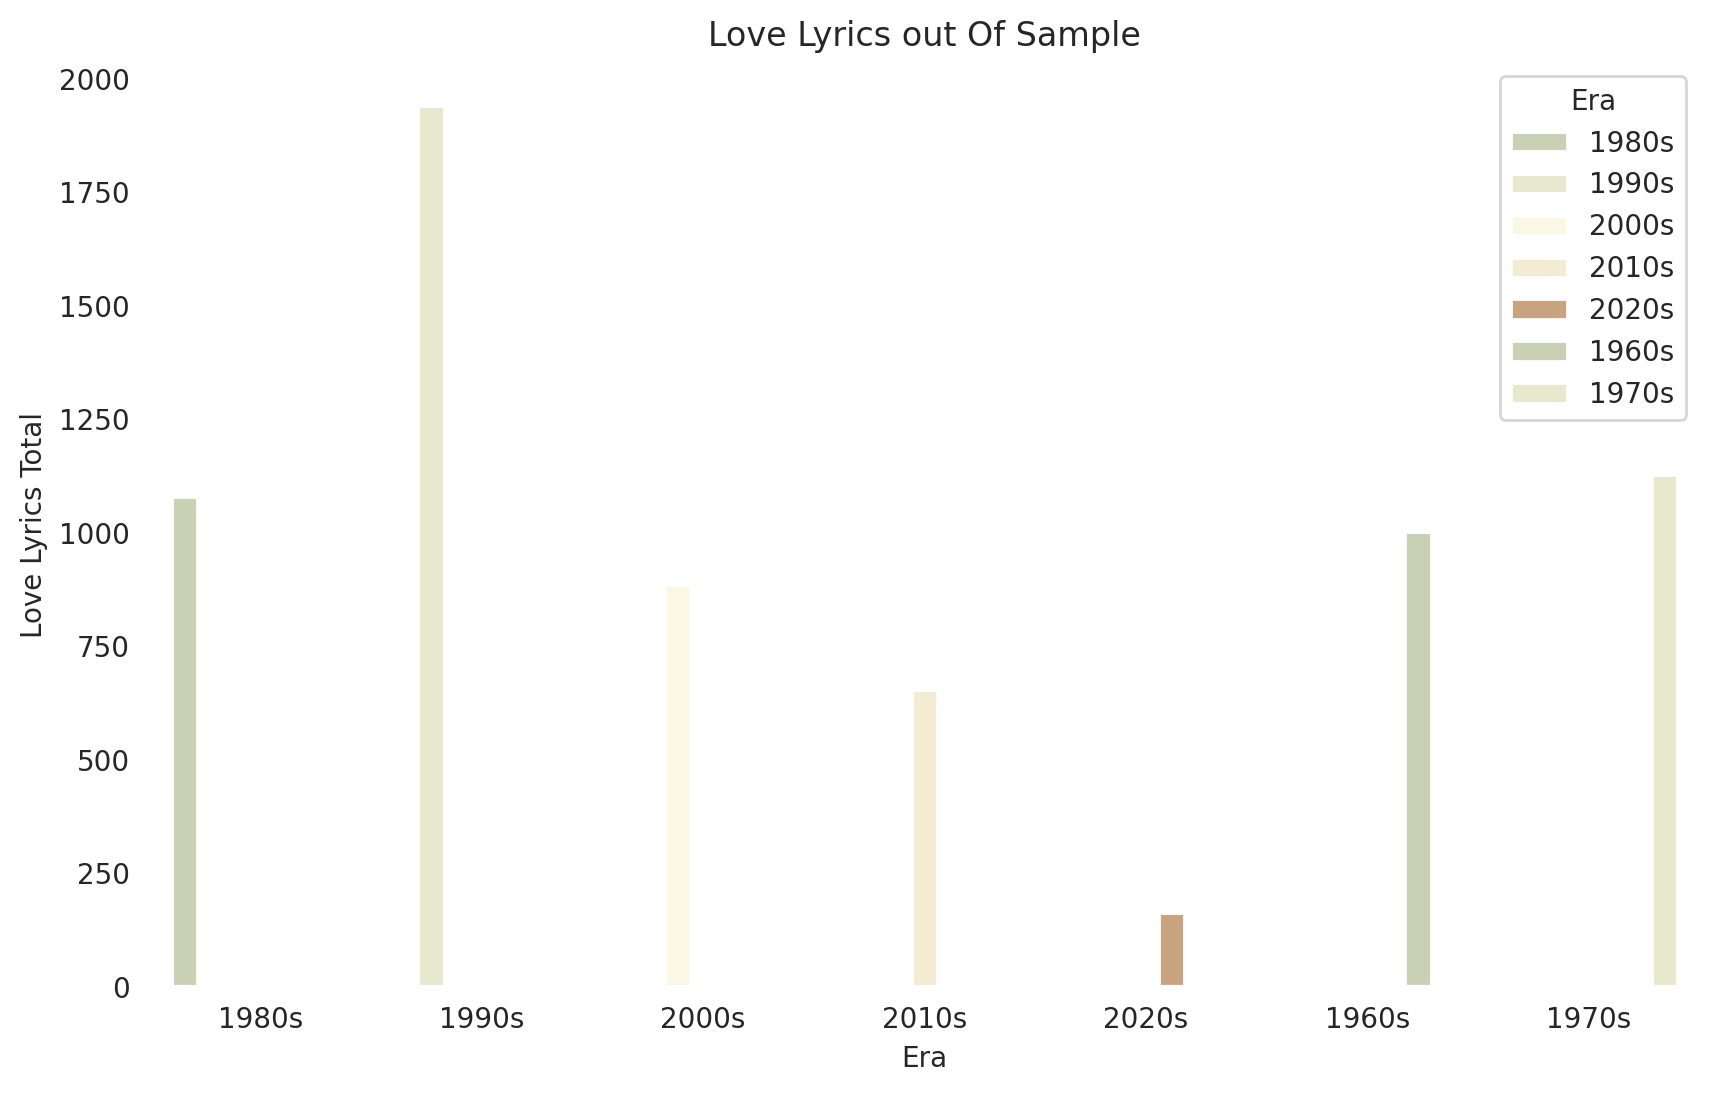

In [ ]:
plt.figure(figsize=(10, 6), dpi=200)
colors = ['#ccd5ae', '#e9edc9', '#fefae0', '#faedcd', '#d4a373']
sns.set_style("darkgrid", {"axes.facecolor": "#FFFFFF"}) # replace with your hex code
sns.barplot(data=df_merger,x='Era',y='love_total',errorbar=None,palette=colors,hue='Era')
plt.xlabel('Era')
plt.ylabel('Love Lyrics Total')
plt.title('Love Lyrics out Of Sample')

plt.show()

### Love Count on What they Loved 

In [ ]:
df_1980s = df_love_NT[df_love_NT['Era'] == '1980s']
df_1980s

,Artist Name,love,dont,know,do,got,song,make,track,get,loving,cause,bitches,aint,loved,kendrick,girl,say,drake,way,baby,time,bitch,hook,rap,need,fall,fell,want,man,show,loves,hate,new,made,shit,said,have,give,little,life,big,has,go,lovely,lil,see,day,rapper,beat,verse,chance,gambino,flow,let,songs,think,lost,bars,lyrics,tell,take,fuck,good,real,future,bad,bit,hoes,money,gon,childish,year,young,single,hit,best,same,feel,people,video,babe,had,game,thing,high,name,tyler,things,did,come,danny,fans,vic,makes,black,j,end,top,heart,problem,sample,looking,t,keep,look,rocky,rock,gotta,shawty,used,world,women,rich,ill,trust,music,album,word,run,verses,great,call,put,left,wayne,production,creator,story,chainz,streets,dope,pusha,cut,other,stay,hot,double,soul,many,whole,done,gone,action,does,delivers,king,using,genius,produced,hear,going,feeling,tracks,sweatshirt,voice,teenage,dark,girls,tech,classic,havin,domo,drums,remix”,vince,instrumental,raps,slow,push,glove,fiasco,true,ride,told,ladies,sounds,bring,old,brother,kid,last,leave,gave,live,woman,drugs,sex,wit,bronson,biggest,flows,u,thug,lie,came,die,kill,night,lets,mean,fake,find,lovers,past,power,peace,memorable,personal,fighting,dropped,staples,tryna,talk,gloves,released,viewed,badass,logic,genesis,catchy,jewels,infectious,worst,native,drops,paints,standout,third,celebration,shook,part,makin,smokin,born,lit,crazy,comes,complicated,friends,mind,rashad,rhymes,felt,city,art,heard,catch,crew,gimme,dance,rare,internet,working,touch,geek,hood,death,changes,gets,dealing,years,brought,try,easy,takes,banger,freddie,gibbs,turned,experiences,references,release,Era,love_total
103,Playboi Carti,86.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,24.0,3.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020s,86.0


In [ ]:
# Here's a random example text
text = "love happy music dance music music happy love love love"
# Generate a word cloud image
wordcloud = WordCloud(font_path='/home/lettuce/MyCode/Where is the love/DejaVuSans.ttf').generate(text)

plt.figure(figsize=(8, 6), dpi=80)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

ValueError: Only supported for TrueType fonts

### Swears Count by Era

In [ ]:
df_summed = df_no_total[['Era', 'fuck','shit','bitch','motherfucker','hoes']].groupby('Era').sum()
df_melted = df_summed.reset_index().melt(id_vars='Era', var_name='word', value_name='count')

NameError: name 'df_no_total' is not defined

<Axes: xlabel='Era', ylabel='count'>

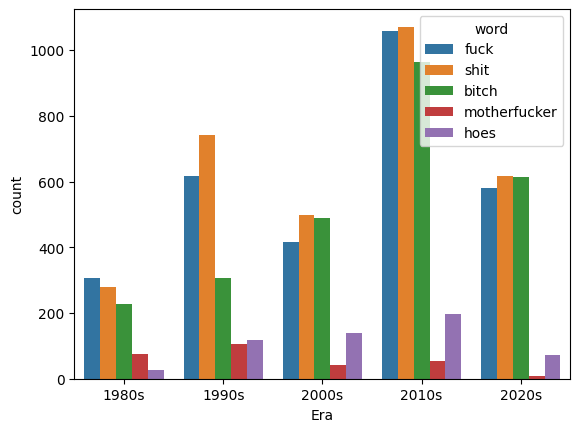

In [ ]:
#Swears over Era
#Histogram 
#This could work better with % of songs that have a swear 

#Need a way to grab like top 


sns.barplot(data=df_melted, x='Era', y='count', hue='word')

### Does more swears = less love